In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

Load Data

In [3]:
df = pd.read_csv('data/raw/heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


Data analyse

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
print('Rows in dataset: ',df.shape[0])
print('Columns in dataset: ',df.shape[1])

Rows in dataset:  303
Columns in dataset:  14


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

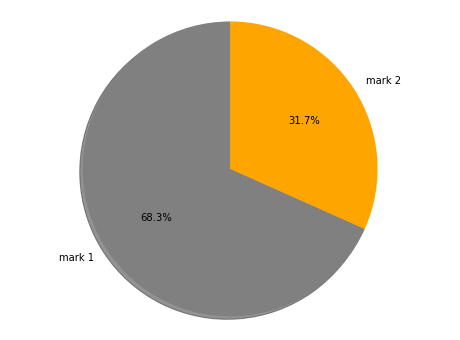

In [8]:
class_1 =len(df[df['sex'] == 1])
class_2 = len(df[df['sex']== 0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'mark 1','mark 2'
sizes = [class_1,class_2]
colors = ['grey', 'orange']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

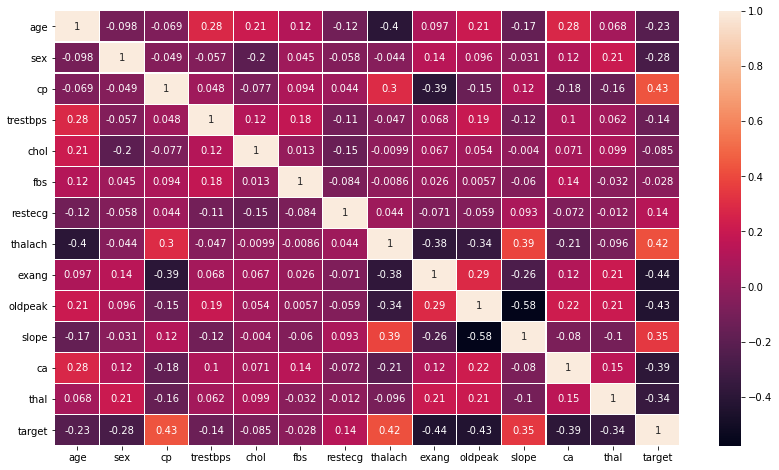

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, linewidths=.1)
plt.show()

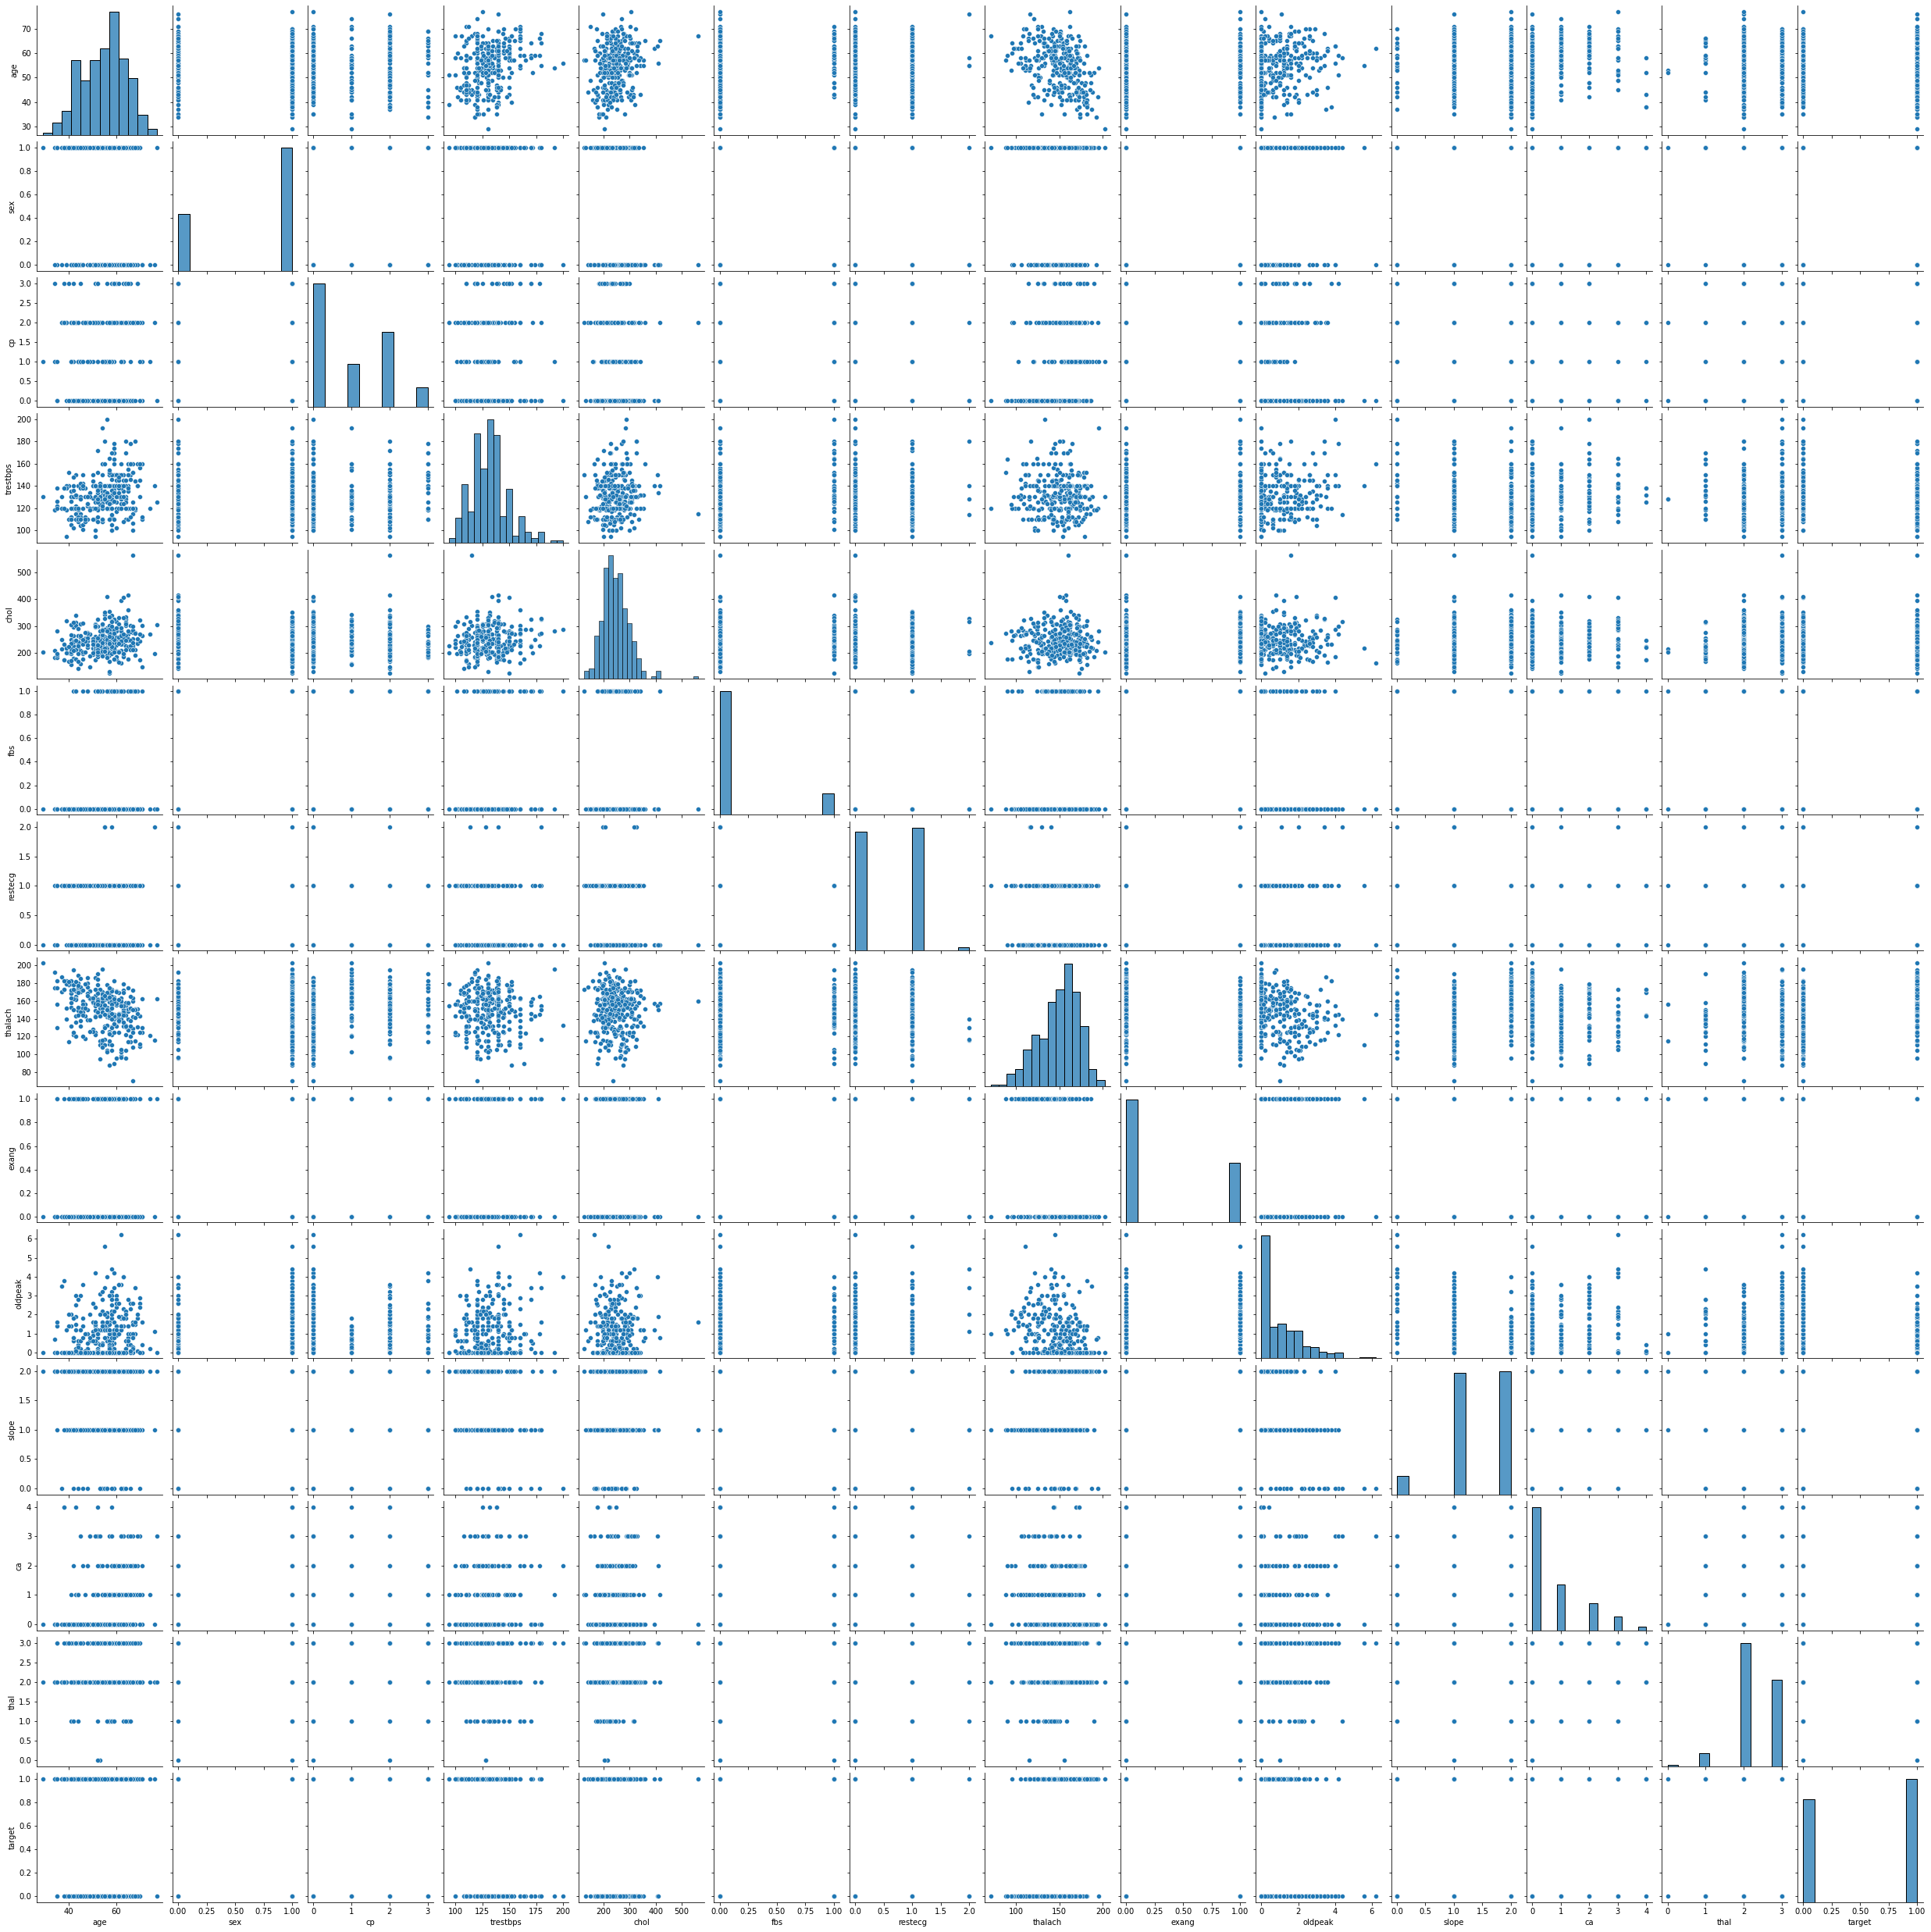

In [10]:
sns.pairplot(df)

1. thalach: maximum heart rate achieved

D:\Users\Vadik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalach'>

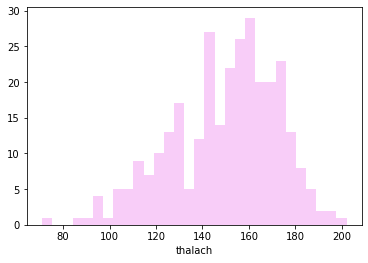

In [11]:
sns.distplot(df['thalach'],kde=False,bins=30,color='violet')

2.chol: serum cholestoral in mg/dl 

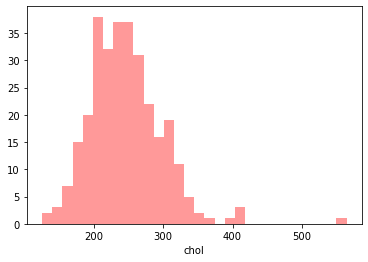

In [12]:
sns.distplot(df['chol'],kde=False,bins=30,color='red')
plt.show()

3. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

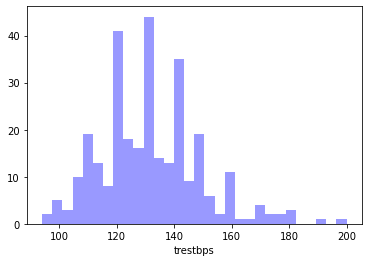

In [13]:
sns.distplot(df['trestbps'],kde=False,bins=30,color='blue')
plt.show()

4. Number of people who have heart disease according to age

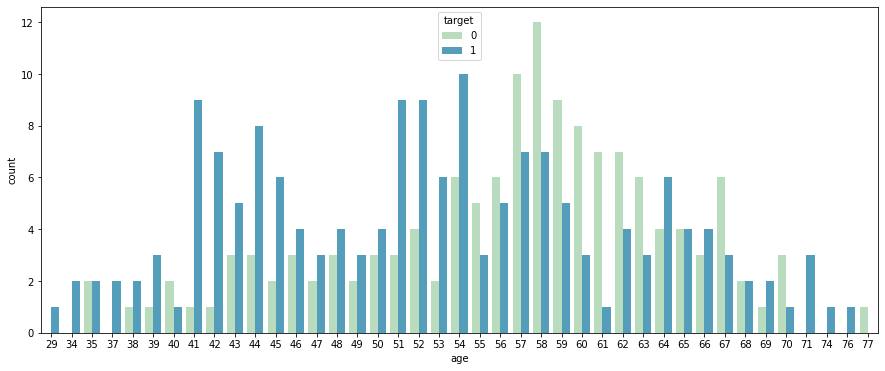

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

5.Scatterplot for thalach vs. chol 

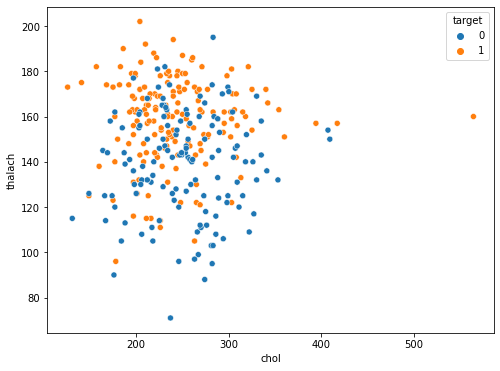

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.show()

6.Scatterplot for thalach vs. trestbps 

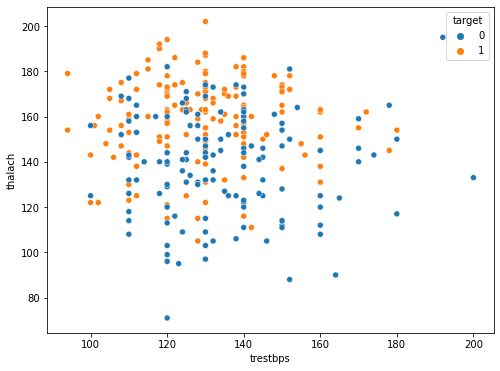

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df,hue='target')
plt.show()

Making Predictions

Splitting the dataset into training and test set

In [17]:
X= df.drop('target',axis=1)
y=df['target']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

Preprocessing - Scaling the features

In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

1. k-Nearest Neighor Algorithm

Implementing GridSearchCv to select best parameters and applying k-NN Algorithm

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn =KNeighborsClassifier()
params = {'n_neighbors':list(range(1,20)),
    'p':[1, 2, 3, 4,5,6,7,8,9,10],
    'leaf_size':list(range(1,20)),
    'weights':['uniform', 'distance']
         }

In [21]:
model = GridSearchCV(knn,params,cv=3, n_jobs=-1)

In [22]:
model.fit(X_train,y_train)
model.best_params_  

{'leaf_size': 1, 'n_neighbors': 14, 'p': 2, 'weights': 'uniform'}

Making predictions

In [23]:
predict = model.predict(X_test)

Checking accuracy

In [24]:
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.8131868131868132
Using k-NN we get an accuracy score of:  81.319 %


In [25]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [26]:
from sklearn.metrics import roc_auc_score,roc_curve

In [27]:
y_probabilities = model.predict_proba(X_test)[:,1]

In [28]:
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,y_probabilities)

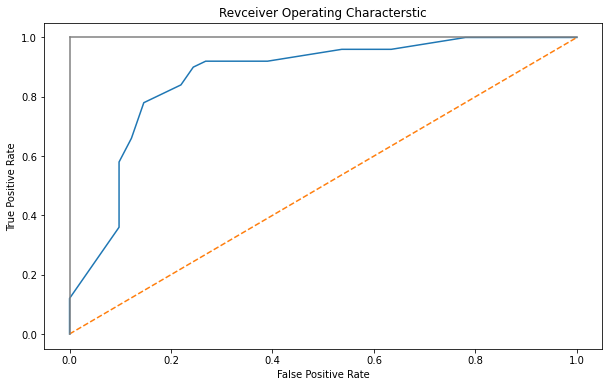

In [29]:
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [30]:
roc_auc_score(y_test,y_probabilities)

0.8651219512195122

3. Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [32]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [33]:
tree_model.fit(X_train,y_train)
#Printing best parameters selected through GridSearchCV
tree_model.best_params_

{'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 11}

In [34]:
predict = tree_model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Decision Tree we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.7252747252747253
Using Decision Tree we get an accuracy score of:  72.527 %


In [36]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

Classification Report

In [37]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



Receiver Operating Characterstic(ROC) Curve

In [38]:
#Get predicted probabilites
target_probailities_tree = tree_model.predict_proba(X_test)[:,1]

In [39]:
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test,
                                                             target_probailities_tree)

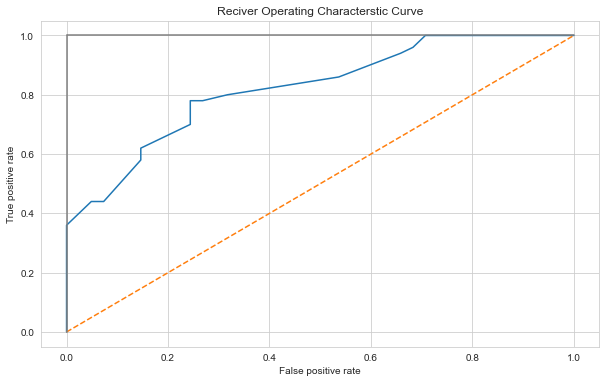

In [40]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [41]:
roc_auc_score(y_test,target_probailities_tree)

0.8212195121951219

In [42]:
import pandas as pd
import numpy as np



size_of_sample = 1000

rows = np.random.choice(df.index.values, size_of_sample)

df_sample = df.loc[rows]

In [43]:
df_sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


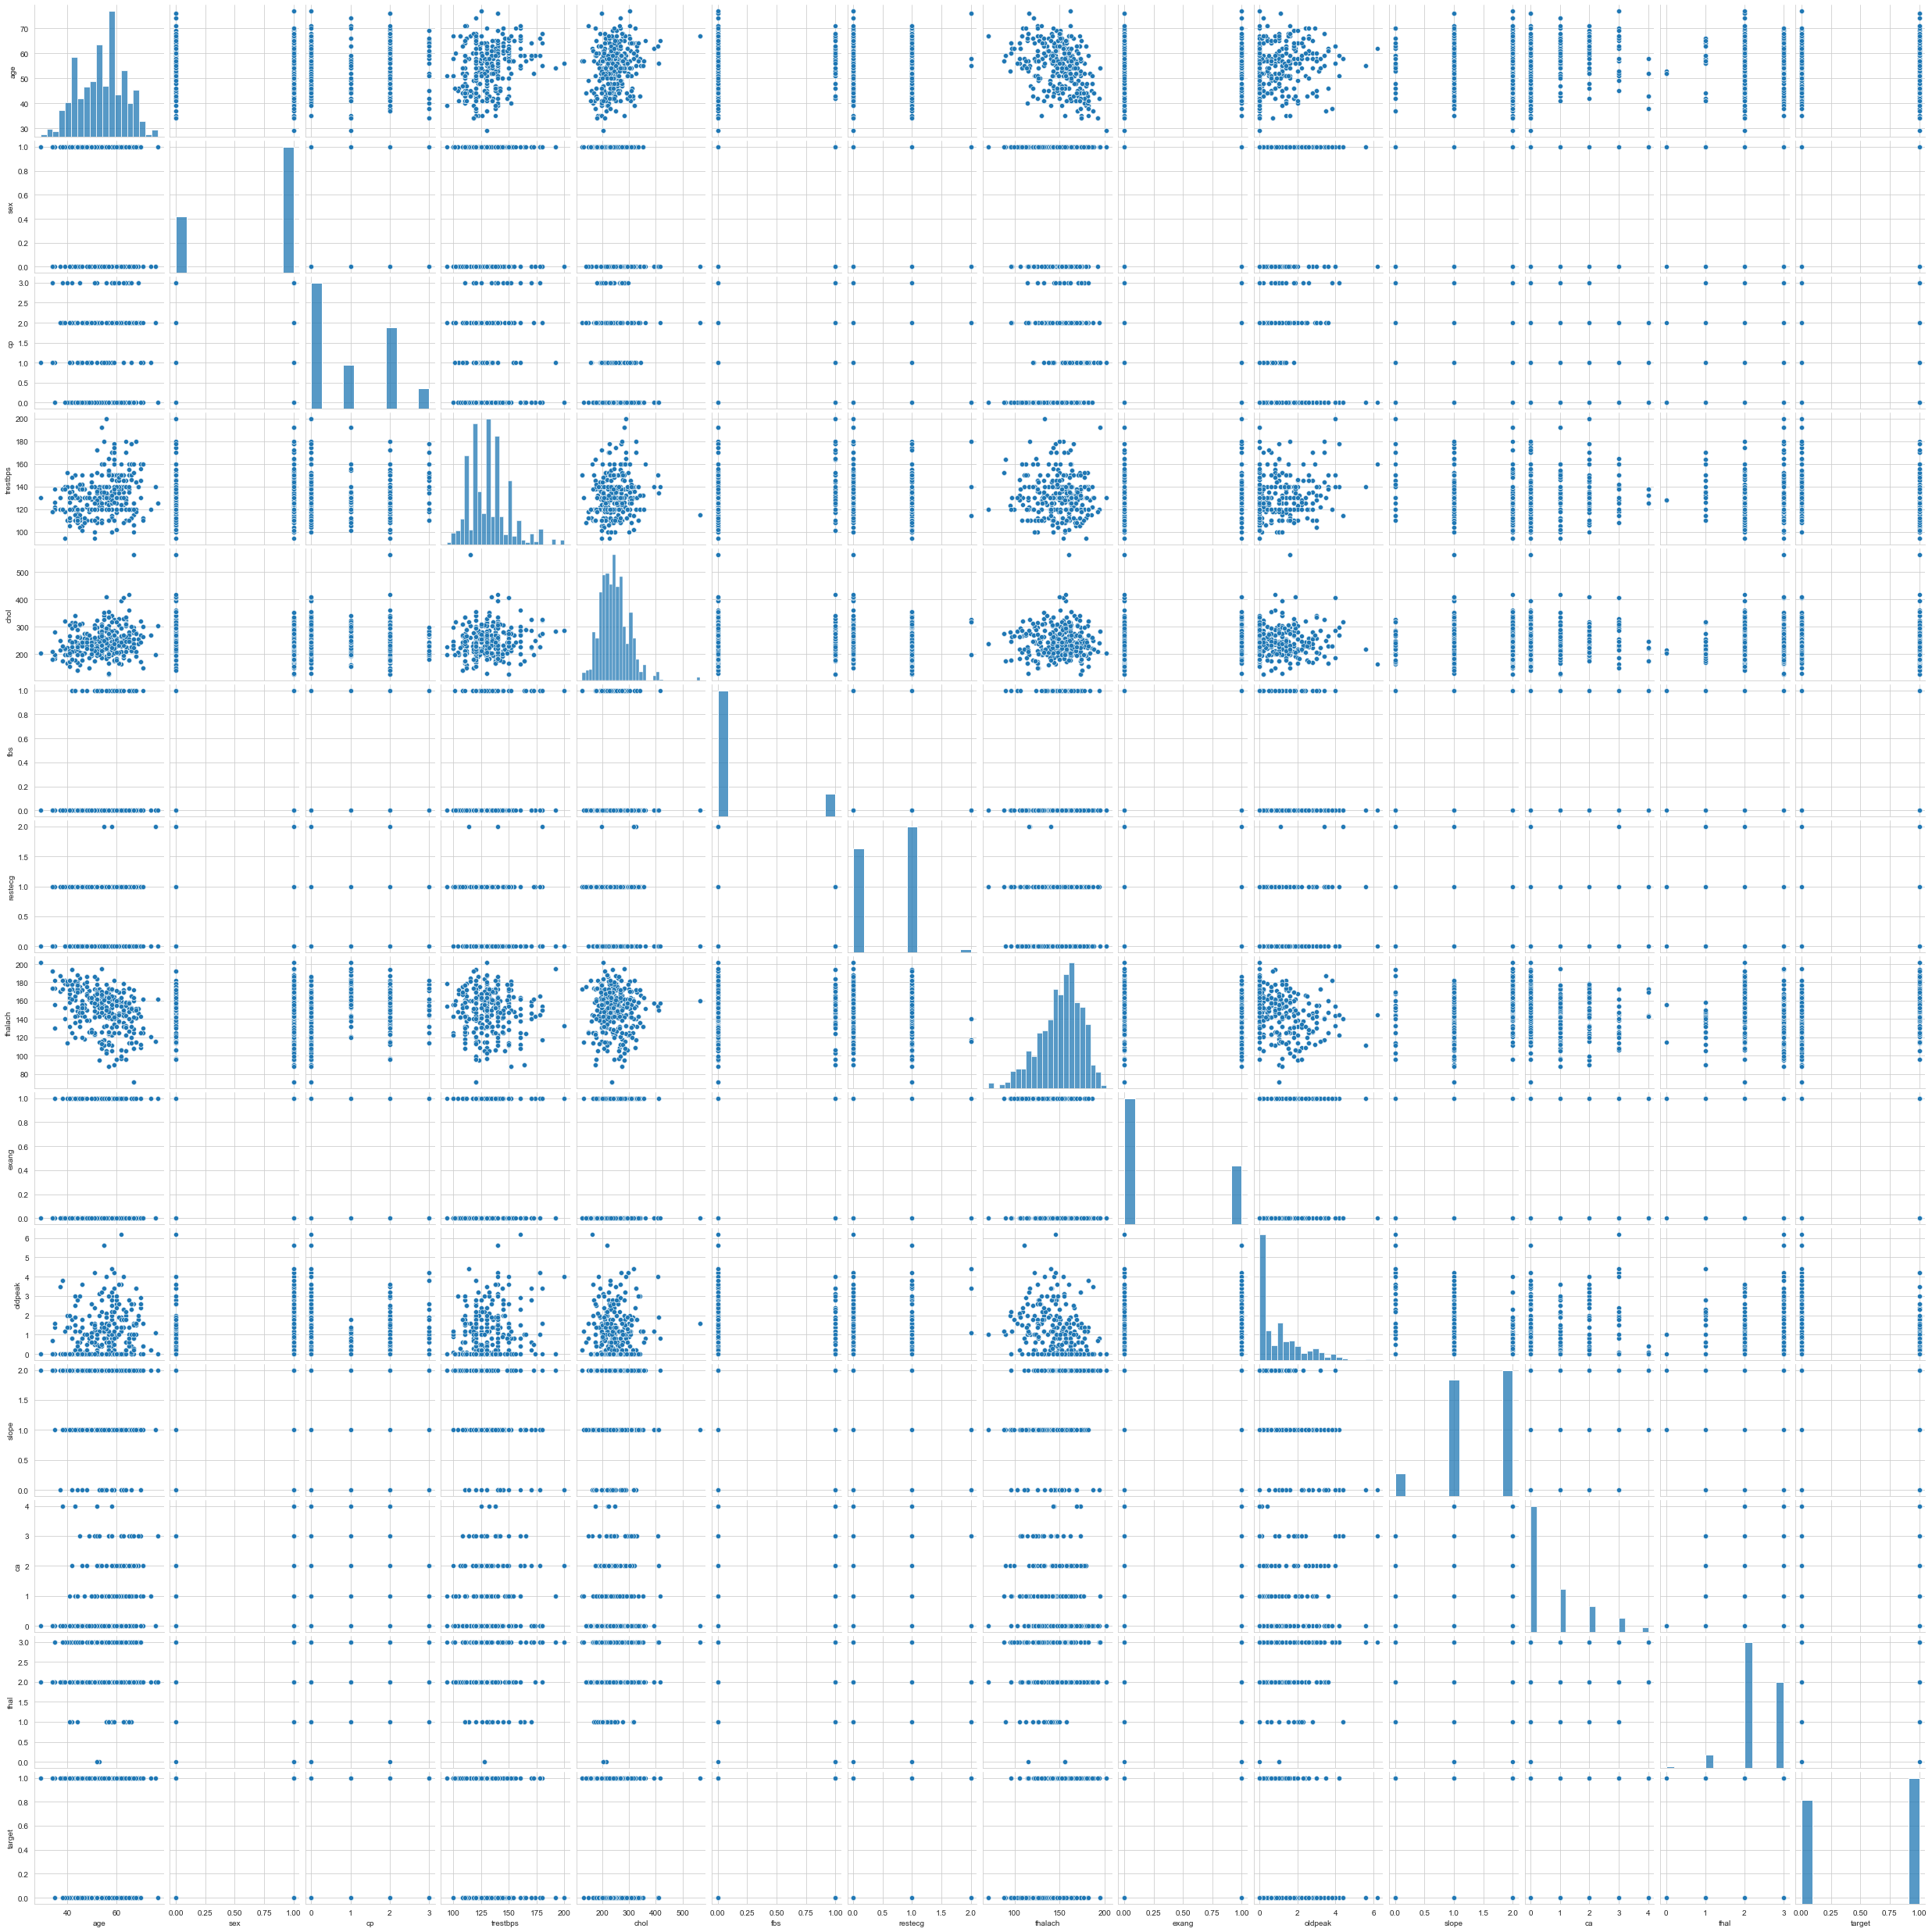

In [44]:
sns.pairplot(df_sample)

In [45]:
df_sample.to_csv('df_sample.csv', index=False)